In [43]:
import pandas as pd
import numpy as np

In [45]:
df= pd.read_csv("crime_dataset_india.csv")


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       40160 non-null  int64 
 1   Date Reported       40160 non-null  object
 2   Date of Occurrence  40160 non-null  object
 3   Time of Occurrence  40160 non-null  object
 4   City                40160 non-null  object
 5   Crime Code          40160 non-null  int64 
 6   Crime Description   40160 non-null  object
 7   Victim Age          40160 non-null  int64 
 8   Victim Gender       40160 non-null  object
 9   Weapon Used         34370 non-null  object
 10  Crime Domain        40160 non-null  object
 11  Police Deployed     40160 non-null  int64 
 12  Case Closed         40160 non-null  object
 13  Date Case Closed    20062 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.3+ MB


In [49]:
import pandas as pd

# Load your crime dataset
crime_data = pd.read_csv('crime_dataset_india.csv')

# Load the city coordinates dataset
city_coords = pd.read_csv('in.csv')

# Merge datasets on the 'City' column
merged_data = pd.merge(crime_data, city_coords, on='city', how='left')

# Check for any missing values in the coordinates
missing_coords = merged_data[merged_data['lat'].isnull() | merged_data['lng'].isnull()]

# Display rows with missing coordinates
print(missing_coords)

# Save the merged dataset
merged_data.to_csv('crime_data_with_coordinates.csv', index=False)

KeyError: 'city'

In [51]:
# Convert all column names to lowercase
crime_data.columns = crime_data.columns.str.lower()
city_coords.columns = city_coords.columns.str.lower()

# Rename column if needed
if 'city ' in crime_data.columns:  # Check if there's an extra space
    crime_data.rename(columns={'city ': 'city'}, inplace=True)
if 'city ' in city_coords.columns:
    city_coords.rename(columns={'city ': 'city'}, inplace=True)

# Print again to verify
print("Crime Data Columns (After Fix):", crime_data.columns.tolist())
print("City Coordinates Columns (After Fix):", city_coords.columns.tolist())


Crime Data Columns (After Fix): ['report number', 'date reported', 'date of occurrence', 'time of occurrence', 'city', 'crime code', 'crime description', 'victim age', 'victim gender', 'weapon used', 'crime domain', 'police deployed', 'case closed', 'date case closed']
City Coordinates Columns (After Fix): ['city', 'lat', 'lng', 'country', 'iso2', 'admin_name', 'capital', 'population', 'population_proper']


In [53]:
merged_data = pd.merge(crime_data, city_coords, on='city', how='left')


In [55]:
merged_data.head()

report number     date reported date of occurrence time of occurrence  \
0              1  02-01-2020 00:00   01-01-2020 00:00   01-01-2020 01:11   
1              2  01-01-2020 19:00   01-01-2020 01:00   01-01-2020 06:26   
2              3  02-01-2020 05:00   01-01-2020 02:00   01-01-2020 14:30   
3              4  01-01-2020 05:00   01-01-2020 03:00   01-01-2020 14:46   
4              5  01-01-2020 21:00   01-01-2020 04:00   01-01-2020 16:51   

        city  crime code crime description  victim age victim gender  \
0  Ahmedabad         576    IDENTITY THEFT          16             M   
1    Chennai         128          HOMICIDE          37             M   
2   Ludhiana         271        KIDNAPPING          48             F   
3       Pune         170          BURGLARY          49             F   
4       Pune         421         VANDALISM          30             F   

    weapon used  ... case closed  date case closed      lat      lng  country  \
0  Blunt Object  ...          No               NaN  23.0225  72.5714    India   
1        Poison  ...          No               NaN  13.0825  80.2750    India   
2  Blunt Object  ...          No               NaN      NaN      NaN      NaN   
3       Firearm  ...         Yes  29-04-2020 05:00  18.5203  73.8567    India   
4         Other  ...         Yes  08-01-2020 21:00  18.5203  73.8567    India   

   iso2   admin_name capital  population population_proper  
0    IN      Gujarāt   minor   8009000.0         5570585.0  
1    IN   Tamil Nādu   admin  12395000.0         6727000.0  
2   NaN          NaN     NaN         NaN               NaN  
3    IN  Mahārāshtra     NaN   8231000.0         3124458.0  
4    IN  Mahārāshtra     NaN   8231000.0         3124458.0  

[5 rows x 22 columns]

In [57]:
print(merged_data[['city', 'lat', 'lng']].head(10))

        city      lat      lng
0  Ahmedabad  23.0225  72.5714
1    Chennai  13.0825  80.2750
2   Ludhiana      NaN      NaN
3       Pune  18.5203  73.8567
4       Pune  18.5203  73.8567
5      Delhi  28.6100  77.2300
6    Chennai  13.0825  80.2750
7    Chennai  13.0825  80.2750
8     Mumbai  19.0761  72.8775
9    Chennai  13.0825  80.2750


In [59]:
missing_coords = merged_data[merged_data['lat'].isnull()]
print("Cities with missing coordinates:", missing_coords['city'].unique())

Cities with missing coordinates: ['Ludhiana' 'Surat' 'Visakhapatnam' 'Kolkata' 'Ghaziabad' 'Hyderabad'
 'Bhopal' 'Varanasi' 'Nagpur' 'Thane' 'Rajkot' 'Vasai' 'Agra' 'Kalyan'
 'Nashik' 'Srinagar' 'Faridabad']


In [61]:
# # Manually fill missing values for specific cities
merged_data.loc[merged_data['city'] == 'Ludhiana', ['lat', 'lng']] = [30.9010, 75.8573]
merged_data.loc[merged_data['city'] == 'Surat', ['lat', 'lng']] = [21.1702, 72.8311]
merged_data.loc[merged_data['city'] == 'Visakhapatnam', ['lat', 'lng']] = [17.6868, 83.2185]
merged_data.loc[merged_data['city'] == 'Kolkata', ['lat', 'lng']] = [22.5744, 88.3629]
merged_data.loc[merged_data['city'] == 'Ghaziabad', ['lat', 'lng']] = [28.6692, 77.4538]
merged_data.loc[merged_data['city'] == 'Hyderabad', ['lat', 'lng']] = [17.4065, 78.4772]
merged_data.loc[merged_data['city'] == 'Bhopal', ['lat', 'lng']] = [23.2599, 77.4126]
merged_data.loc[merged_data['city'] == 'Varanasi', ['lat', 'lng']] = [25.3176, 82.9739]  # Corrected coordinates
merged_data.loc[merged_data['city'] == 'Nagpur', ['lat', 'lng']] = [21.1458, 79.0882]
merged_data.loc[merged_data['city'] == 'Thane', ['lat', 'lng']] = [19.2183, 72.9781]
merged_data.loc[merged_data['city'] == 'Rajkot', ['lat', 'lng']] = [22.3039, 70.8022]
merged_data.loc[merged_data['city'] == 'Vasai', ['lat', 'lng']] = [19.3919, 72.8397]
merged_data.loc[merged_data['city'] == 'Agra', ['lat', 'lng']] = [27.1767, 78.0081]
merged_data.loc[merged_data['city'] == 'Kalyan', ['lat', 'lng']] = [19.2403, 73.1305]
merged_data.loc[merged_data['city'] == 'Nashik', ['lat', 'lng']] = [19.9975, 73.7898]
merged_data.loc[merged_data['city'] == 'Srinagar', ['lat', 'lng']] = [34.0837, 74.7973]
merged_data.loc[merged_data['city'] == 'Faridabad', ['lat', 'lng']] = [28.4089, 77.3178]


In [63]:
print(merged_data[merged_data['lat'].isnull()])

Empty DataFrame
Columns: [report number, date reported, date of occurrence, time of occurrence, city, crime code, crime description, victim age, victim gender, weapon used, crime domain, police deployed, case closed, date case closed, lat, lng, country, iso2, admin_name, capital, population, population_proper]
Index: []

[0 rows x 22 columns]


In [65]:
merged_data.to_csv('crime_data_with_filled_coords.csv', index=False)

In [67]:
print(merged_data.columns)

Index(['report number', 'date reported', 'date of occurrence',
       'time of occurrence', 'city', 'crime code', 'crime description',
       'victim age', 'victim gender', 'weapon used', 'crime domain',
       'police deployed', 'case closed', 'date case closed', 'lat', 'lng',
       'country', 'iso2', 'admin_name', 'capital', 'population',
       'population_proper'],
      dtype='object')


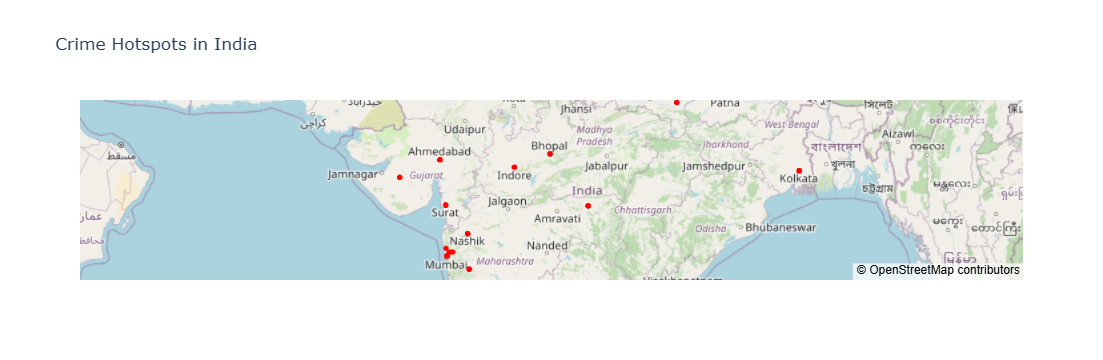

In [69]:
import pandas as pd
import plotly.express as px

# Remove missing values
merged_data = merged_data.dropna(subset=['lat', 'lng'])

# Convert lat/lng to float
merged_data['lat'] = merged_data['lat'].astype(float)
merged_data['lng'] = merged_data['lng'].astype(float)

# Sample 500 records for better performance
sampled_data = merged_data.sample(n=500, random_state=42)

# Create an interactive scatter map
fig = px.scatter_mapbox(
    sampled_data, 
    lat="lat", 
    lon="lng", 
    hover_name="city", 
    hover_data=["crime description"], 
    color_discrete_sequence=["red"], 
    zoom=4,
    title="Crime Hotspots in India"
)

# Use OpenStreetMap style
fig.update_layout(mapbox_style="open-street-map")

# Show the interactive map
fig.show()


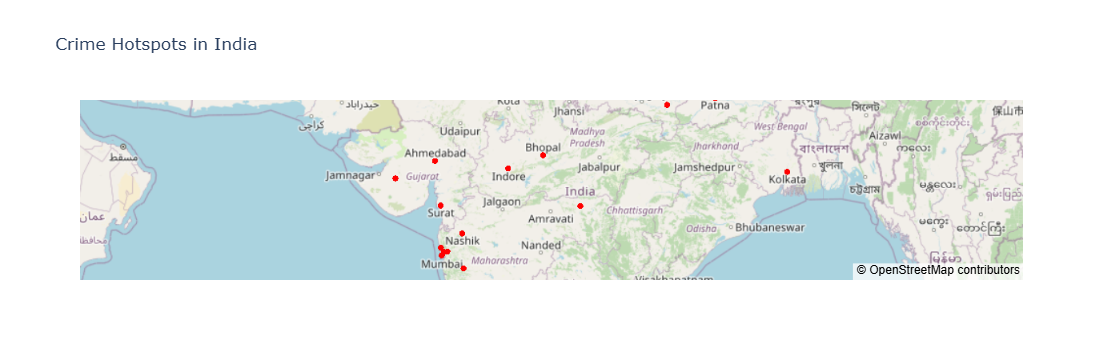

In [71]:
import pandas as pd
import plotly.express as px

# Remove missing lat/lng values
merged_data = merged_data.dropna(subset=['lat', 'lng'])

# Convert lat/lng to float
merged_data['lat'] = merged_data['lat'].astype(float)
merged_data['lng'] = merged_data['lng'].astype(float)

# Create an interactive scatter map with crime domain
fig = px.scatter_mapbox(
    merged_data, 
    lat="lat", 
    lon="lng", 
    hover_name="city", 
    hover_data= "crime domain",  # Added "crime domain"
    color_discrete_sequence=["red"], 
    zoom=4,
    title="Crime Hotspots in India"
)

# Use OpenStreetMap style
fig.update_layout(mapbox_style="open-street-map")

# Show the interactive map
fig.show()



In [73]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   report number       40160 non-null  int64  
 1   date reported       40160 non-null  object 
 2   date of occurrence  40160 non-null  object 
 3   time of occurrence  40160 non-null  object 
 4   city                40160 non-null  object 
 5   crime code          40160 non-null  int64  
 6   crime description   40160 non-null  object 
 7   victim age          40160 non-null  int64  
 8   victim gender       40160 non-null  object 
 9   weapon used         34370 non-null  object 
 10  crime domain        40160 non-null  object 
 11  police deployed     40160 non-null  int64  
 12  case closed         40160 non-null  object 
 13  date case closed    20062 non-null  object 
 14  lat                 40160 non-null  float64
 15  lng                 40160 non-null  float64
 16  coun

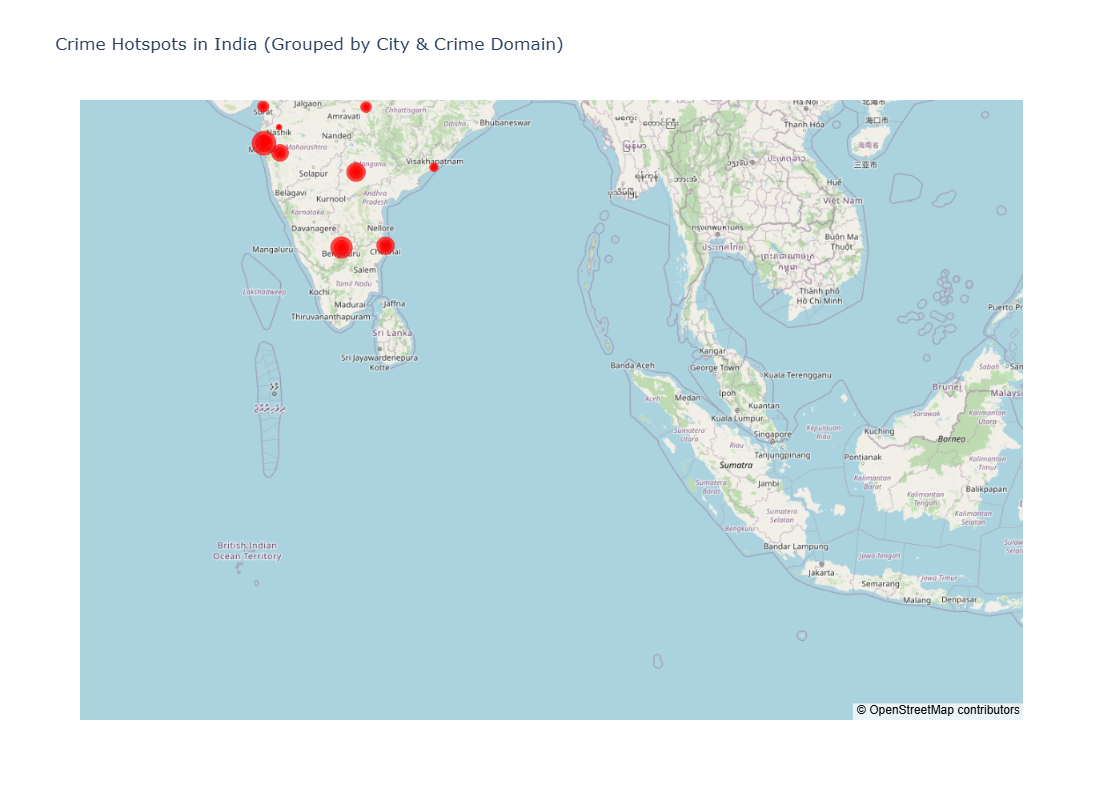

In [75]:
import pandas as pd
import plotly.express as px

# Remove missing lat/lng values
merged_data = merged_data.dropna(subset=['lat', 'lng'])

# Convert lat/lng to float
merged_data['lat'] = merged_data['lat'].astype(float)
merged_data['lng'] = merged_data['lng'].astype(float)

# Group by city and crime domain to count occurrences
grouped_data = merged_data.groupby(['city', 'crime domain']).size().reset_index(name='crime_count')

# Merge lat/lng back to get unique city coordinates
city_coords = merged_data[['city', 'lat', 'lng']].drop_duplicates()
grouped_data = grouped_data.merge(city_coords, on='city', how='left')

# Create a bubble map where bubble size represents crime frequency
fig = px.scatter_mapbox(
    grouped_data, 
    lat="lat", 
    lon="lng", 
    size="crime_count",  # Bubble size based on crime count
    hover_name="city", 
    hover_data=["crime domain", "crime_count"],  # Removed lat/lng from hover data
    color_discrete_sequence=["red"], 
    zoom=4,
    title="Crime Hotspots in India (Grouped by City & Crime Domain)"
)

# Use OpenStreetMap style

fig.update_layout(
    mapbox_style="open-street-map",
    height=800,  # Increase height (Default is ~500)
    width=1200   # Increase width (Optional)
)

# Show the interactive map
fig.show()


In [117]:
import pandas as pd

# Reload dataset
df = merged_data.copy()  # Ensure we're working with the original

# Drop unnecessary columns
df = df[['city', 'lat', 'lng', 'day', 'hour', 'victim age', 'victim gender', 'weapon used', 'police deployed', 'crime code']]

# Handle missing values (instead of dropping all)
df['victim age'].fillna(df['victim age'].median(), inplace=True)  
df['weapon used'].fillna("Unknown", inplace=True)  
df['police deployed'].fillna(0, inplace=True)  

# Convert categorical features using One-Hot Encoding
df = pd.get_dummies(df, columns=['city', 'victim gender', 'weapon used'])

# Normalize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['lat', 'lng', 'victim age', 'hour', 'police deployed']] = scaler.fit_transform(df[['lat', 'lng', 'victim age', 'hour', 'police deployed']])

# Ensure dataset is not empty
print(df.shape)  # Should show non-zero rows
print(df.head())  # Preview processed data

# Define X and y
X = df.drop(columns=['crime code'])  
y = df['crime code']  

# Split into train-test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data Preprocessing Fixed! Ready for Model Training 🚀")


(40160, 46)
        lat       lng  day  hour  victim age  police deployed  crime code  \
0  0.232630 -1.196439    1   NaN   -1.408694         0.547515         576   
1 -1.597067  0.682509    1   NaN   -0.370391        -0.184029         128   
2  1.682859 -0.394991    1   NaN    0.173483         0.913288         271   
3 -0.596109 -0.882948    1   NaN    0.222926        -1.647118         170   
4 -0.596109 -0.882948    1   NaN   -0.716492         1.461946         421   

   city_Agra  city_Ahmedabad  city_Bangalore  ...  victim gender_F  \
0      False            True           False  ...            False   
1      False           False           False  ...            False   
2      False           False           False  ...             True   
3      False           False           False  ...             True   
4      False           False           False  ...             True   

   victim gender_M  victim gender_X  weapon used_Blunt Object  \
0             True            False    

C:\Users\smedh\AppData\Local\Temp\ipykernel_24636\1272207493.py:10: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\smedh\AppData\Local\Temp\ipykernel_24636\1272207493.py:11: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [119]:
df['hour'].fillna(df['hour'].mode()[0], inplace=True)  # Fill NaN with most frequent hour


KeyError: 0

In [121]:
print(df.columns)  # Ensure 'hour' is in the dataset
print(df['hour'].isnull().sum())  # Count missing values
print(df['hour'].unique())  # Check unique values in 'hour'


Index(['lat', 'lng', 'day', 'hour', 'victim age', 'police deployed',
       'crime code', 'city_Agra', 'city_Ahmedabad', 'city_Bangalore',
       'city_Bhopal', 'city_Chennai', 'city_Delhi', 'city_Faridabad',
       'city_Ghaziabad', 'city_Hyderabad', 'city_Indore', 'city_Jaipur',
       'city_Kalyan', 'city_Kanpur', 'city_Kolkata', 'city_Lucknow',
       'city_Ludhiana', 'city_Meerut', 'city_Mumbai', 'city_Nagpur',
       'city_Nashik', 'city_Patna', 'city_Pune', 'city_Rajkot',
       'city_Srinagar', 'city_Surat', 'city_Thane', 'city_Varanasi',
       'city_Vasai', 'city_Visakhapatnam', 'victim gender_F',
       'victim gender_M', 'victim gender_X', 'weapon used_Blunt Object',
       'weapon used_Explosives', 'weapon used_Firearm', 'weapon used_Knife',
       'weapon used_Other', 'weapon used_Poison', 'weapon used_Unknown'],
      dtype='object')
40160
[nan]


In [1]:
git init
git add README.md
git commit -m "first commit"
git branch -M main
git remote add origin https://github.com/Medha375/crime_prediction.git
git push -u origin main

SyntaxError: invalid syntax (2181661965.py, line 1)